In [2]:
%pip install pandas matplotlib nltk wordcloud

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows of the dataset:
                                                Text  label
0  This is  the best apps acording to a bunch of ...      1
1  This is a pretty good version of the game for ...      1
2  this is a really . there are a bunch of levels...      1
3  This is a silly game and can be frustrating, b...      1
4  This is a terrific game on any pad. Hrs of fun...      1

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None

Dataset statistics:
              label
count  19996.000000
mean       0.761652
std        0.426083
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Processing text: This is  the best apps acordin...
Processing text: This is a pre

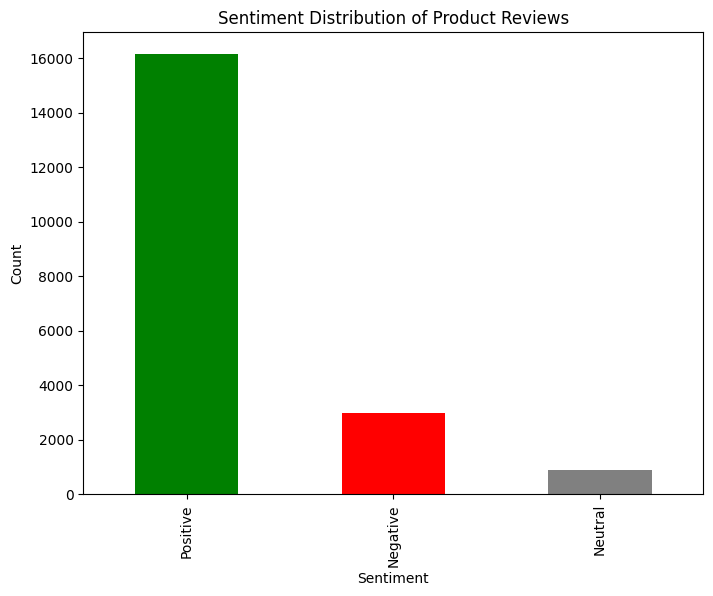

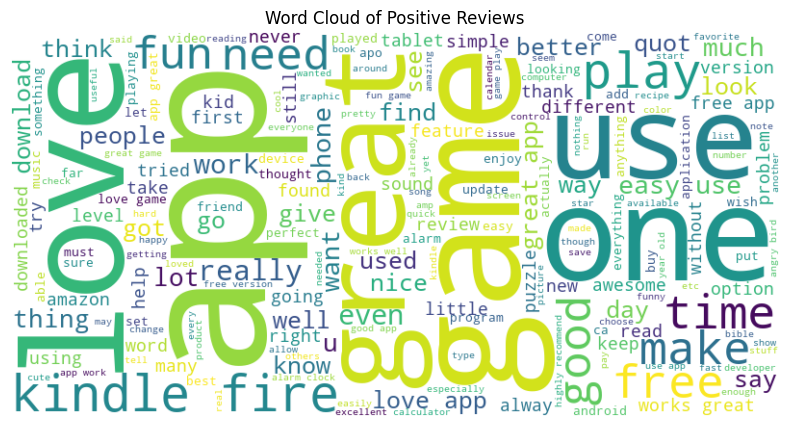


Sentiment analysis complete and results visualized.


In [8]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset  # Ensure the file path is correct
file_path = './Dataset/amazon.csv'
data = pd.read_csv(file_path)

# Check if the 'Text' column exists
if 'Text' not in data.columns:
    raise ValueError("The 'Text' column is not found in the dataset. Please check the column names.")

# Check for null values in the 'Text' column
if data['Text'].isnull().any():
    print("Null values found in 'Text' column. Filling them with an empty string.")
    data['Text'] = data['Text'].fillna('')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nDataset summary:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset statistics:")
print(data.describe())

# Preprocess text data
def preprocess_text(text):
    print(f"Processing text: {text[:30]}...")  # Print the first 30 characters for debugging
    
    # Tokenization
    try:
        tokens = word_tokenize(text.lower())
    except Exception as e:
        print(f"Error during tokenization: {e}")
        return ""  # Return an empty string in case of an error

    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word is not None and word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_reviews'] = data['Text'].apply(preprocess_text)

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
data['sentiment_scores'] = data['cleaned_reviews'].apply(sia.polarity_scores)
data['compound'] = data['sentiment_scores'].apply(lambda x: x['compound'])
data['sentiment'] = data['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate a word cloud of positive reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_reviews'])

if positive_reviews.strip():  # Check if positive_reviews is not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Positive Reviews')
    plt.show()
else:
    print("No positive reviews found, skipping word cloud generation.")

print("\nSentiment analysis complete and results visualized.")